In [1]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
import time
from docx import Document

In [2]:
# Setting up chrome driver
driver = uc.Chrome()
# Accessing Website
driver.get('https://chat.openai.com')
# Log in
x_path = "(//div[normalize-space()='Log in'])[1]"
time.sleep(5)
driver.find_element(By.XPATH, x_path).click()
# Log in credential
# Enter Email (Should be Signed Up at chat.openai.com)
time.sleep(5)
EMAIL = "YOUR_EMAIL"
x_path = "(//input[@id='username'])[1]"
inputElement = driver.find_element(By.XPATH, x_path)
inputElement.click()
inputElement.send_keys(EMAIL)
inputElement.send_keys(Keys.RETURN)

time.sleep(5)
# Enter Password
PASSWORD = "YOUR_PASSWORD"
x_path = "(//input[@id='password'])[1]"
inputElement = driver.find_element(By.XPATH, x_path)
inputElement.click()
inputElement.send_keys(PASSWORD)
inputElement.send_keys(Keys.RETURN)

# Skipping Prompts
time.sleep(10)
x_path = "(//button[@class='btn relative btn-neutral ml-auto'])[1]"
driver.find_element(By.XPATH, x_path).click()
x_path = "(//button[@class='btn relative btn-neutral ml-auto'])[1]"
driver.find_element(By.XPATH, x_path).click()
x_path = "(//button[@class='btn relative btn-primary ml-auto'])[1]"
driver.find_element(By.XPATH, x_path).click()

# Query 1
query1 = "generate a car dataset with 30 entires in form of table not as code"
x_path = "(//textarea[@id='prompt-textarea'])[1]"
inputElement = driver.find_element(By.XPATH, x_path)
inputElement.click()
inputElement.send_keys(query1)
inputElement.send_keys(Keys.RETURN)
time.sleep(60)
# Extracting Table Header
table = driver.find_element(By.TAG_NAME, 'table')
header_row = table.find_element(By.TAG_NAME, 'thead').find_element(By.TAG_NAME, 'tr')
header_cells = header_row.find_elements(By.TAG_NAME, 'th')
header_data = []
for cell in header_cells:
    header_data.append(cell.text)

print("Scrapped Output: ")
print("Query 1")
print("Header:", header_data)

# Extracting Table Data
data_rows = table.find_element(By.TAG_NAME, 'tbody').find_elements(By.TAG_NAME, 'tr')
table_data = []
for row in data_rows:
    cells = row.find_elements(By.TAG_NAME, 'td')
    row_data = []
    for cell in cells:
        row_data.append(cell.text)
    table_data.append(row_data)

print("Data:", table_data)

# Open new chat
time.sleep(5)
x_path = "(//a[@class='flex p-3 items-center gap-3 transition-colors duration-200 text-white cursor-pointer text-sm rounded-md border border-white/20 hover:bg-gray-500/10 h-11 flex-shrink-0 flex-grow'])[1]"
driver.find_element(By.XPATH, x_path).click()

# Query 2
print("Query 2")
time.sleep(5)
query2 = "Write a blog with heading about machine learning"
x_path = "(//textarea[@id='prompt-textarea'])[1]"
inputElement = driver.find_element(By.XPATH, x_path)
inputElement.click()
inputElement.send_keys(query2)
inputElement.send_keys(Keys.RETURN)
time.sleep(60)

# Extracting Heading and Content 
x_path = "(//div[@class='markdown prose w-full break-words dark:prose-invert light'])[1]"
blog_content = driver.find_element(By.XPATH, x_path)
paragraphs = blog_content.find_elements(By.TAG_NAME,'p')

document = Document()
for paragraph in paragraphs:
    text = paragraph.text
    print(text)
    document.add_paragraph(text)

driver.quit()

Scrapped Output: 
Query 1
Header: ['Brand', 'Model', 'Year', 'Mileage (km)', 'Price ($)']
Data: [['Toyota', 'Camry', '2018', '30,000', '18,500'], ['Honda', 'Civic', '2017', '45,000', '15,200'], ['Ford', 'Focus', '2019', '25,500', '16,800'], ['Hyundai', 'Sonata', '2016', '55,000', '14,000'], ['BMW', 'X5', '2018', '35,000', '45,000'], ['Nissan', 'Sentra', '2017', '40,500', '12,500'], ['Audi', 'A4', '2018', '28,000', '22,500'], ['Honda', 'Accord', '2019', '23,000', '19,800'], ['Toyota', 'Corolla', '2016', '42,000', '13,700'], ['Chevrolet', 'Malibu', '2017', '48,500', '14,900'], ['Ford', 'Mustang', '2018', '18,000', '27,500'], ['Toyota', 'Highlander', '2019', '32,500', '31,000'], ['BMW', '3', '2017', '37,000', '28,900'], ['Nissan', 'Altima', '2016', '50,500', '13,200'], ['Audi', 'Q5', '2020', '12,500', '38,000'], ['Honda', 'CR-V', '2020', '15,000', '23,500'], ['Ford', 'Explorer', '2017', '39,500', '21,200'], ['Hyundai', 'Elantra', '2018', '29,000', '14,800'], ['Toyota', 'RAV4', '2020', '14

In [3]:
# Saving Dataset Generated as CSV from Query 1
import pandas as pd
carDataset = pd.DataFrame(table_data,columns=header_data)
carDataset.to_csv('carDataset.csv', index=False)

In [4]:
# Loading CSV
df = pd.read_csv('carDataset.csv')
df.head()

,Brand,Model,Year,Mileage (km),Price ($)
0,Toyota,Camry,2018,"30,000","18,500"
1,Honda,Civic,2017,"45,000","15,200"
2,Ford,Focus,2019,"25,500","16,800"
3,Hyundai,Sonata,2016,"55,000","14,000"
4,BMW,X5,2018,"35,000","45,000"


In [11]:
# Sorting Dataset According to Price
sorted_df = df.sort_values(by='Price ($)', ascending=True)
sorted_df.head()

,Brand,Model,Year,Mileage (km),Price ($)
5,Nissan,Sentra,2017,"40,500","12,500"
13,Nissan,Altima,2016,"50,500","13,200"
8,Toyota,Corolla,2016,"42,000","13,700"
21,Honda,Fit,2017,"38,500","13,800"
3,Hyundai,Sonata,2016,"55,000","14,000"


In [12]:
# Calculating Sum of Car prices from each brand
sorted_df['Price ($)'] = sorted_df['Price ($)'].str.replace('$', '', regex=True) #remove $ sign if present
sorted_df['Price ($)'] = sorted_df['Price ($)'].str.replace(',', '', regex=True) #remove , sign if present
sorted_df['Price ($)'] = sorted_df['Price ($)'].astype(int) #converting to integer
brand_sum_prices = sorted_df.groupby('Brand')['Price ($)'].sum().reset_index() #sum
brand_total_prices_df = pd.DataFrame({
    'Brand': brand_sum_prices['Brand'],
    'Total Price': brand_sum_prices['Price ($)']
})
brand_total_prices_df = brand_total_prices_df.sort_values(by='Total Price', ascending=True) #sorting
brand_total_prices_df.head()

,Brand,Total Price
2,Chevrolet,31300
6,Nissan,41600
5,Hyundai,49100
0,Audi,86500
4,Honda,101800


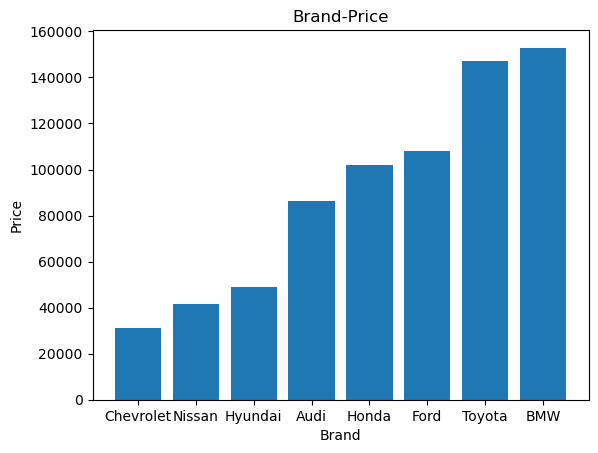

In [14]:
# display graph
import matplotlib.pyplot as plt
x = brand_total_prices_df['Brand']
y = brand_total_prices_df['Total Price']
plt.bar(x, y)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand-Price')
plt.show()

In [15]:
#Saving result from query 2 as docx
filename = 'paragraphs.docx'
document.save(filename)